In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from PIL import Image # sudo pip install Pillow

from sklearn.model_selection import train_test_split #sudo pip install sklearn


# Data Preparation

In [3]:
class FaceDataset:
    # Initialize the dataset class
    def __init__(self, data_path):
        self.data_path = data_path
        self.usernames = []
        # for all obj in our given data directory
        for obj in os.listdir(data_path):
            full_path = os.path.join(data_path, obj)
            # only add to holder if obj is a directory
            if os.path.isdir(full_path):
                self.usernames.append(obj)
        
        # load image data into the kernel
        self.user_data = {}
        for user in self.usernames:
            user_path = os.path.join(data_path, obj)
            user_holder = []
            for user_image in os.listdir(user_path):
                image_path = os.path.join(data_path, user, user_image)
                # load the image but skip mac shenaigans
                if os.path.isfile(image_path) and user_image != '.DS_store':
                    _temp = Image.open(image_path)
                    image = _temp.copy()
                else:
                    continue
                user_holder.append(image)
            self.user_data[user] = user_holder
            

In [4]:
data_path = './face_data/' # accquired from http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
auth_data = FaceDataset(data_path)

# auth_data.user_data now contains our user information.

# Exploring Data

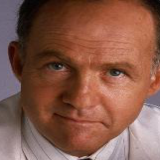

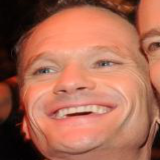

In [5]:
from IPython.display import display
# Example Images of celeb: '0000439'

display(auth_data.user_data['0000439'][3])
display(auth_data.user_data['0000439'][7]) # my jupyter notebook shows different photos

In [6]:
auth_data.usernames

['0358316',
 '0515116',
 '0519456',
 '0688132',
 '0010736',
 '0004770',
 '0424060',
 '0000439',
 '0221043',
 '0004266']

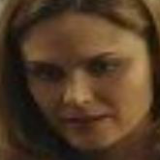

In [7]:
display(auth_data.user_data['0221043'][3]) # my jupyter notebook shows different photos

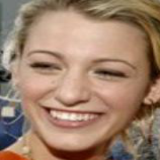

In [8]:
display(auth_data.user_data['0515116'][30]) # my jupyter notebook shows different photos

In [9]:
auth_data.user_data['0515116'][30].__dict__

{'im': <ImagingCore at 0x11e7051d0>,
 'mode': 'RGB',
 '_size': (160, 160),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None,
 'encoderinfo': {},
 'encoderconfig': (False, -1, -1, b'')}

In [10]:
auth_data.user_data['0515116'][30].size

(160, 160)

In [11]:
np.array(auth_data.user_data['0515116'][30])

array([[[108, 119, 115],
        [110, 121, 117],
        [112, 123, 119],
        ...,
        [128, 114,  88],
        [133, 120,  96],
        [144, 132, 109]],

       [[105, 116, 112],
        [108, 119, 115],
        [111, 122, 118],
        ...,
        [123, 109,  80],
        [126, 111,  84],
        [133, 119,  94]],

       [[100, 111, 107],
        [104, 115, 111],
        [109, 120, 116],
        ...,
        [123, 107,  74],
        [121, 105,  74],
        [122, 107,  77]],

       ...,

       [[186,  70,  15],
        [183,  68,  10],
        [183,  67,   6],
        ...,
        [104, 100,  91],
        [101,  97,  86],
        [100,  93,  83]],

       [[183,  64,  15],
        [181,  62,  12],
        [184,  65,  14],
        ...,
        [101,  97,  88],
        [ 98,  94,  83],
        [100,  93,  83]],

       [[183,  64,  19],
        [181,  62,  17],
        [185,  66,  21],
        ...,
        [ 95,  92,  83],
        [ 99,  95,  86],
        [107, 100,  90]]

In [12]:
160*160*3

76800

In [13]:
np.array(auth_data.user_data['0515116'][30]).flatten()

array([108, 119, 115, ..., 107, 100,  90], dtype=uint8)

In [49]:
"""My jupyter shows different photos."""

'My jupyter shows different photos.'

# Data-Processing: Extracting Features

In [33]:
def demo_extract_features(user_data):
    # this demonstration only arranges the pixel info in a vector
    feature_holder = []
    label_holder = []
    for user, user_data in user_data.items():
        for data in user_data:
            feature_holder.append(np.array(data).flatten())
            label_holder.append(user)

    data_arr = np.array(feature_holder)
    label_arr = np.array(label_holder)
    
    return data_arr, label_arr


def extract_features(self):
    #######################################################
    # student code can go here
    #######################################################

    # extracted features should go here
    data_arr = None
    label_arr = None

    assert data_arr is not None
    assert label_arr is not None
    
    return data_arr, label_arr


def split_data(data_arr, label_arr, test_split=0.2):
    _temp = train_test_split(data_arr, label_arr,
                             test_size=test_split, random_state=42,
                             stratify= label_arr)
    # what does stratify mean, and why would we strafity data?
    x_train, x_test, y_train, y_test = _temp

    training_data = (x_train, y_train)
    testing_data = (x_test, y_test)
    
    return training_data, testing_data

In [34]:
########################
# Extract features
########################
data_arr, label_arr = demo_extract_features(auth_data.user_data)
# use this function call for your own implementation
# extract_features(data_arr, label_arr, auth_data.user_data)

########################
# Split data into train, test
########################
training_data, testing_data = split_data(data_arr, label_arr, test_split=0.2)

In [35]:
label_arr.shape

(6667,)

In [36]:
(x_train, y_train) = training_data
(x_test, y_test) = testing_data

print(len(x_train), len(y_train))
assert len(x_train) == len(y_train)
print(len(x_test), len(y_test))
assert len(x_test) == len(y_test)

5333 5333
1334 1334


# Train Machine Learning Model for Identification

In [37]:
# We us a random forest classifier in this example.
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [38]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
'''
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of 
the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size 
is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used 
to build each tree.
'''

clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

## Compute metrics

In [39]:
y_pred_test = clf.predict(x_test)
print(y_test)
print(y_pred_test)

['0004266' '0221043' '0515116' ... '0004266' '0000439' '0010736']
['0004266' '0221043' '0515116' ... '0004266' '0004770' '0010736']


In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

     0000439       0.73      0.73      0.73       142
     0004266       0.75      0.73      0.74       161
     0004770       0.61      0.75      0.67       124
     0010736       0.66      0.64      0.65       130
     0221043       0.58      0.48      0.52       127
     0358316       0.73      0.81      0.77       123
     0424060       0.66      0.45      0.54       126
     0515116       0.58      0.56      0.57       130
     0519456       0.67      0.73      0.70       149
     0688132       0.69      0.80      0.74       122

    accuracy                           0.67      1334
   macro avg       0.67      0.67      0.66      1334
weighted avg       0.67      0.67      0.67      1334



# Train Machine Learning Model for Verification

In [41]:
# We us a random forest classifier in this example.
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [42]:
# We choose one user to isolate
target_user = '0000439'

# The classification task will posed as a one vs. all (ova) task.
# as such we change all the labels of the target to 1,
# and we change all the labels that is no the target to 0.

ova_y_train = y_train == target_user
ova_y_test = y_test == target_user

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

clf.fit(x_train, ova_y_train)

RandomForestClassifier(n_jobs=-1)

## Compute metrics

In [44]:
ova_y_pred_test = clf.predict(x_test)
print(ova_y_test)
print(ova_y_pred_test)

[False False False ... False  True False]
[False False False ... False False False]


In [45]:
from sklearn import metrics
print(metrics.classification_report(ova_y_test, ova_y_pred_test))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1192
        True       0.95      0.40      0.56       142

    accuracy                           0.93      1334
   macro avg       0.94      0.70      0.76      1334
weighted avg       0.94      0.93      0.92      1334



## Binary classification metrics

In [46]:
# Sourced from https://github.com/scikit-learn/scikit-learn/issues/15247#issuecomment-542138349
from sklearn.metrics import roc_curve
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def calculate_eer(y_true, y_score):
    '''
    Returns the equal error rate for a binary classifier output.
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    return eer


# Weekly Submission Task

Equal Error Rate (EER): 0.1440298507462687


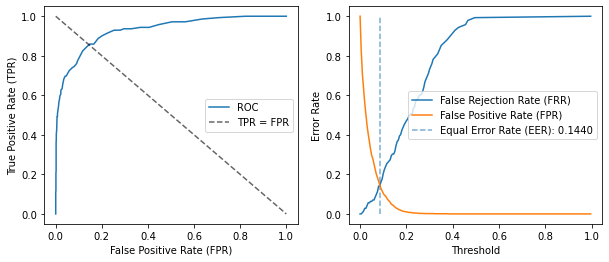

In [47]:
import matplotlib.pyplot as plt

# predict with label probabilities

ova_y_predproba_test = clf.predict_proba(x_test)

# compute Reciever Operator Characteristics
fpr, tpr, thresholds = metrics.roc_curve(ova_y_test, ova_y_predproba_test[:, 1], pos_label=1)


# rescale thrsholds
thresholds = thresholds/2.0

# plot results of ROC
plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
ax.plot(fpr, tpr, label='ROC')
ax.plot([0, 1], [1, 0], label='TPR = FPR', color='k',linestyle='--', alpha=0.6)
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.legend()
# plot FPR and FRR independently.
ax = plt.subplot(1, 2, 2)
ax.plot(thresholds, 1-tpr, label='False Rejection Rate (FRR)')
ax.plot(thresholds, fpr, label='False Positive Rate (FPR)')
# compute EER, and find the closest threshold
eer = calculate_eer(ova_y_test, ova_y_predproba_test[:, 1])
closest_eer = min(fpr, key=lambda x:abs(x-eer))
eer_thresh = thresholds[np.argwhere(fpr == closest_eer)[0]]
# plot EER on same plot
ax.vlines(eer_thresh, 0, 1, linestyle='--', alpha=0.6,
          label='Equal Error Rate (EER): {:.4f}'.format(eer))

ax.set_xlabel('Threshold')
ax.set_ylabel('Error Rate')
ax.legend()

print('Equal Error Rate (EER): {}'.format(eer))

plt.savefig('verification_metrics.png')

In [48]:
# False Rejection Rate (FRR):
# The false rejection rate is the measure of the likelihood that the biometric security system 
# will incorrectly reject an access attempt by an authorized user. A system's FRR typically is 
# stated as the ratio of the number of false rejections divided by the number of identification attempts.


# False Positive Rate (FRR):
# The false positive rate is the proportion of all negatives that still yield positives outcomes. 
# (e.g., the percentage of non-sick people who are wrongly identified as having some illness)

# True Positive Rate (TPR)
# TPR measures the proportion of positives that are correctly identified (e.g., the percentage of 
# sick people who are correctly identified as having some illness).

# A receiver operating characteristic curve, or ROC curve is measure decide the tradeoff between TPR and FPR



